## Observations and Insights

* Of the 4 Drug Regimens we plotted, only one had an outlier. All of the data was pretty equally distributed. Capomulin had a larger interquartile range than the others. 
* When Capomulin was used, as time increased, the size of the tumor would decrease. We can hypothesize that this drug was effective with treating tumors in the mice. 
* There is a correlation between the weight of a mouse and their average tumor volume when treated with Capomulin. As weight increases, there is more likely to be a larger tumor.



## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
group_drug = combined_df.groupby("Drug Regimen")
meandrug = group_drug["Tumor Volume (mm3)"].mean()
mediandrug = group_drug["Tumor Volume (mm3)"].median()
vardrug = group_drug["Tumor Volume (mm3)"].var()
stddrug = group_drug["Tumor Volume (mm3)"].std()
semdrug = group_drug["Tumor Volume (mm3)"].sem()

summarydrug = pd.DataFrame({ "Mean": meandrug,"Median": mediandrug,"Variance": vardrug, 
                            "Standard Deviation":stddrug, "SEM": semdrug})

summarydrug


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

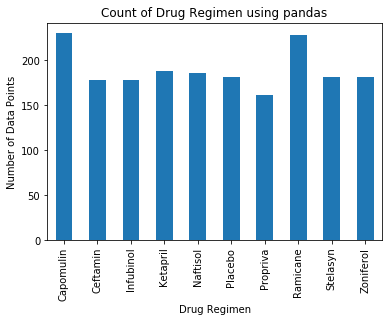

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#gender = combined_df.groupby("Sex").count().reset_index()
count_drug = combined_df.groupby(["Drug Regimen"]).count()
group_drug = pd.DataFrame(count_drug).reset_index()
group_drugdata = group_drug[["Drug Regimen", "Mouse ID"]]
setgroup_drug = group_drugdata.set_index("Drug Regimen")

barplot = setgroup_drug.plot(kind = "bar", legend = None)

barplot.set_xlabel("Drug Regimen")
barplot.set_ylabel("Number of Data Points")
barplot.set_title("Count of Drug Regimen using pandas")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of Data Points')

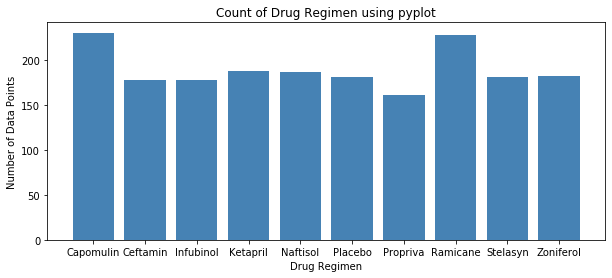

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drugs = summarydrug.index.tolist()
list_drug = (combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(list_drug))
plt.figure(figsize=(10,4))
plt.bar(x_axis, list_drug, color="steelblue", align="center",)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drugs)
plt.title("Count of Drug Regimen using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


## Pie plots

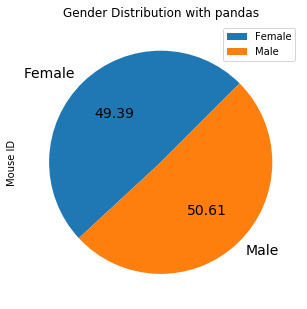

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(combined_df.groupby("Sex").count()).reset_index()
gender_df = gender[["Sex","Mouse ID"]]


gender_pie = gender_df.plot(kind="pie",y="Mouse ID", title=("Gender Distribution with pandas"), labels = gender_df["Sex"]
                            ,figsize=(5,8), autopct="%.2f", fontsize=14, startangle=45)



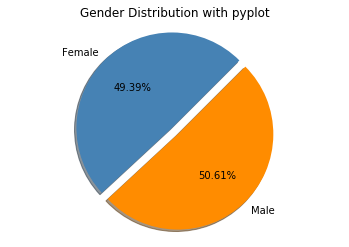

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
listgender = gender_df["Mouse ID"].tolist()

# The colors of each section of the pie chart
colors = ["steelblue", "darkorange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.09, 0)

plt.pie(listgender, explode=explode, labels=gender_df["Sex"], colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=45)

plt.axis("equal")
plt.title("Gender Distribution with pyplot")

plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

groupmouse = combined_df.groupby(["Mouse ID", "Drug Regimen"])
newmouse = groupmouse["Tumor Volume (mm3)"].last().reset_index()

Capomulin = newmouse[newmouse["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = newmouse[newmouse["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = newmouse[newmouse["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = newmouse[newmouse["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]

drugdata = [Capomulin, Ramicane, Infubinol, Ceftamin]


quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------------------")

quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------------------")

quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------------------")

quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------------------------")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
----------

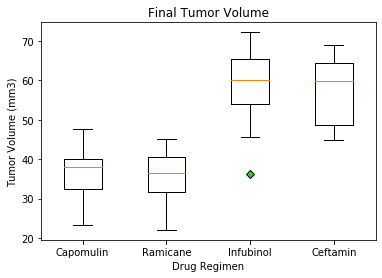

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

green_diamond = dict(markerfacecolor='limegreen', marker='D')

drugs = [" ",'Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

plt.xticks(x_axis, drugs)
ax1.boxplot(drugdata,flierprops=green_diamond)
plt.show()

## Line and scatter plots

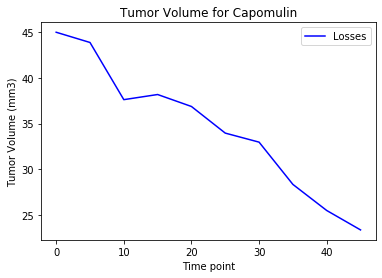

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = combined_df[combined_df["Drug Regimen"] == "Capomulin"]
tumorvolume = capomulin_df[capomulin_df["Mouse ID"]== "s185"]["Tumor Volume (mm3)"]

timepoint = combined_df["Timepoint"].unique()

plt.plot(timepoint, tumorvolume, color="blue", label="Losses")
plt.legend(loc="best")
plt.title("Tumor Volume for Capomulin")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

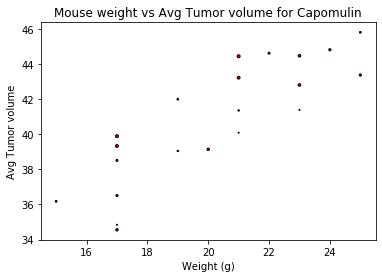

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

group_capo = capomulin_df.groupby("Mouse ID")
avg_volume = group_capo["Tumor Volume (mm3)"].mean()
avg_weight = group_capo["Weight (g)"].mean()

x = avg_weight
y = avg_volume

plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", s=x_axis)
plt.title("Mouse weight vs Avg Tumor volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor volume")
plt.show()

The correlation coefficient is 0.84


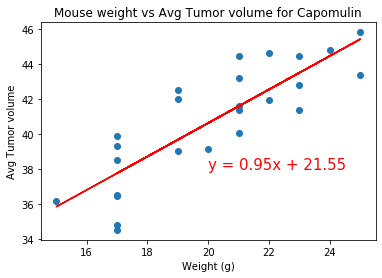

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_weight,avg_volume)
print(f"The correlation coefficient is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20, 38),fontsize=15,color="red")
plt.title("Mouse weight vs Avg Tumor volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor volume")
plt.show()